# Cement w/ 5mm Cu Wires - Feb 8

Plot 2 above, shows a strange frequency spectrum for 700 kHz. This is the first indication of a spectrum not matching the input frequency.

Since learning that Jacob tracked the P-wave part of the probe (S-wave transducers), I collected new data and tracked the P-wave part as well. The data I collected previously on Dec 13th was before I knew about S-wave transducers producing P-waves and S-waves. Plus, the following data is a 1-cycle probe (like Jacob used). On Dec 13th, I used 4 cycles.

In [1]:
import peakutils
from peakutils import indexes, peak

def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

def FWHM(x,y):
    
    fits = peakutils.peak.gaussian_fit(x, y, center_only=False)
    x_new = np.linspace(x[0],x[-1],100)
    gaus_y = gaussian(x_new,fits[0], fits[1], fits[2])
    
    # Find the indices of the peaks
    peak_indices = indexes(gaus_y, thres=0.5, min_dist=1)

    # Get the index of the highest peak
    max_index = peak_indices[np.argmax(gaus_y[peak_indices])]

    # Calculate the FWHM
    half_max = gaus_y[max_index] / 2.0
    left_index = np.argmin(np.abs(gaus_y[:max_index] - half_max))
    right_index = np.argmin(np.abs(gaus_y[max_index:] - half_max)) + max_index
    fwhm = x_new[right_index] - x_new[left_index]
    
    # Find central frequency from peak index:
    central_freq = x_new[max_index]

    print("Peak Index:", max_index)
    print("Central Frequency:", central_freq)
    print("FWHM:", fwhm)
    print("")
    return x_new,gaus_y, max_index, central_freq, fwhm

In [2]:
exec(open('ComputeDelays.py').read())
from myfft import myfft

Cwc_100=timedata('Cwc_100')
readlabdat('feb8_9.csv',Cwc_100)
Cwc_200=timedata('Cwc_200')
readlabdat('feb8_10.csv',Cwc_200)
Cwc_300=timedata('Cwc_300')
readlabdat('feb8_11.csv',Cwc_300)
Cwc_400=timedata('Cwc_400')
readlabdat('feb8_8.csv',Cwc_400)
Cwc_500=timedata('Cwc_500')
readlabdat('feb8_7.csv',Cwc_500)
Cwc_600=timedata('Cwc_600')
readlabdat('feb8_6.csv',Cwc_600)
Cwc_700=timedata('Cwc_700')
readlabdat('feb8_5.csv',Cwc_700)
Cwc_800=timedata('Cwc_800')
readlabdat('feb8_0.csv',Cwc_800)
Cwc_900=timedata('Cwc_900')
readlabdat('feb8_3.csv',Cwc_900)
Cwc_1000=timedata('Cwc_1000')
readlabdat('feb8_4.csv',Cwc_1000)

In [3]:
f1,FT1=myfft(Cwc_100.time,Cwc_100.data)
f2,FT2=myfft(Cwc_200.time,Cwc_200.data)
f3,FT3=myfft(Cwc_300.time,Cwc_300.data)
f4,FT4=myfft(Cwc_400.time,Cwc_400.data)
f5,FT5=myfft(Cwc_500.time,Cwc_500.data)
f6,FT6=myfft(Cwc_600.time,Cwc_600.data)
f7,FT7=myfft(Cwc_700.time,Cwc_700.data)
f8,FT8=myfft(Cwc_800.time,Cwc_800.data)
f9,FT9=myfft(Cwc_900.time,Cwc_900.data)
f10,FT10=myfft(Cwc_1000.time,Cwc_1000.data)

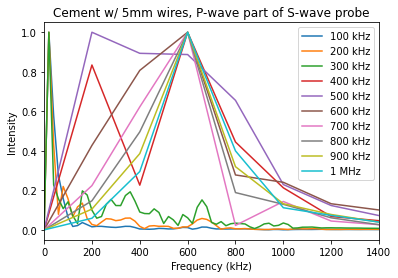

In [32]:
plt.title('Cement w/ 5mm wires, P-wave part of S-wave probe')
plt.plot(f1,np.abs(FT1)/max(np.abs(FT1)),label='100 kHz')
plt.plot(f2,np.abs(FT2)/max(np.abs(FT2)),label='200 kHz')
plt.plot(f3,np.abs(FT3)/max(np.abs(FT3)),label='300 kHz')
plt.plot(f4,np.abs(FT4)/max(np.abs(FT4)),label='400 kHz')
plt.plot(f5,np.abs(FT5)/max(np.abs(FT5)),label='500 kHz')
plt.plot(f6,np.abs(FT6)/max(np.abs(FT6)),label='600 kHz')
plt.plot(f7,np.abs(FT7)/max(np.abs(FT7)),label='700 kHz')
plt.plot(f8,np.abs(FT8)/max(np.abs(FT8)),label='800 kHz')
plt.plot(f9,np.abs(FT9)/max(np.abs(FT9)),label='900 kHz')
plt.plot(f10,np.abs(FT10)/max(np.abs(FT10)),label='1 MHz')

plt.xlim([0,1400])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('CemCopp5mm_Strans_Ppart_FFT.jpeg',dpi=300)

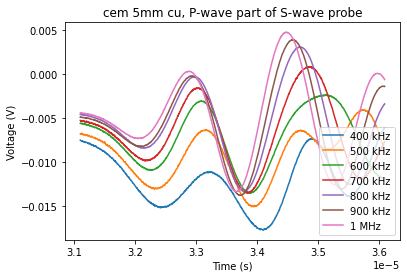

In [4]:
#plt.plot(Cwc_100.time,Cwc_100.data)
#plt.plot(Cwc_200.time,Cwc_200.data)
#plt.plot(Cwc_300.time,Cwc_300.data)
plt.plot(Cwc_400.time,Cwc_400.data, label="400 kHz")
plt.plot(Cwc_500.time,Cwc_500.data, label="500 kHz")
plt.plot(Cwc_600.time,Cwc_600.data, label="600 kHz")
plt.plot(Cwc_700.time,Cwc_700.data, label="700 kHz")
plt.plot(Cwc_800.time,Cwc_800.data, label="800 kHz")
plt.plot(Cwc_900.time,Cwc_900.data, label="900 kHz")
plt.plot(Cwc_1000.time,Cwc_1000.data, label="1 MHz")

plt.title("cem 5mm cu, P-wave part of S-wave probe")
plt.legend(loc=4)
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.savefig('CemCopp5mm_Strans_Ppart.jpeg',dpi=300)

In [21]:
t = 31.6*1e-6  # s, time for p-wave to arrive
space = 5*1e-3 # metres, 5mm space between wires 


Text(0.5, 0, 'Frequency (kHz)')

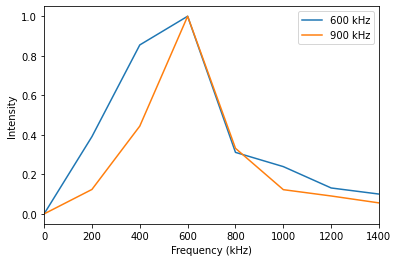

In [28]:
# I collected the following two files after autoscalling and re-finding the P-part of the probe. I did this to make
# sure I was saving the right part of the wave

Cwc600=timedata('Cwc600')
readlabdat('feb8_12.csv',Cwc600)
Cwc900=timedata('Cwc900')
readlabdat('feb8_13.csv',Cwc900)

f600,FT600=myfft(Cwc600.time,Cwc600.data)
f900,FT900=myfft(Cwc900.time,Cwc900.data)

plt.plot(f600,np.abs(FT600)/max(np.abs(FT600)),label='600 kHz')
plt.plot(f900,np.abs(FT900)/max(np.abs(FT900)),label='900 kHz')

plt.xlim([0,1400])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')

# Trial 2 - Feb 9

Given the exciting results from yesterday, I repeated the experiments with careful consideration of which part of the wave I'm saving. Over the frequency range of 100 kHz - 1 MHz, I save the whole signal (p and s part, not all the noise after), just the p-wave and  just the s-wave part. Between each experiment I autoscalled and re-found the region of the wave, to make sure I was getting the right region. Prior to these eperiments, I visually confirmed that changing the frequency was actuallu chnaging the output (I double checked because Trigger was blinking) going direct from gen to scope and again with the two transducers together w no sample (I did not save this data, just visual confirmation).

In [4]:
# whole wave (Cement w Copper, trial 2)
Cwc2_100=timedata('Cwc2_100')
readlabdat('feb9_28.csv',Cwc2_100)
Cwc2_200=timedata('Cwc2_200')
readlabdat('feb9_25.csv',Cwc2_200)
Cwc2_300=timedata('Cwc2_300')
readlabdat('feb9_22.csv',Cwc2_300)
Cwc2_400=timedata('Cwc2_400')
readlabdat('feb9_19.csv',Cwc2_400)
Cwc2_500=timedata('Cwc2_500')
readlabdat('feb9_16.csv',Cwc2_500)
Cwc2_600=timedata('Cwc2_600')
readlabdat('feb9_13.csv',Cwc2_600)
Cwc2_700=timedata('Cwc2_700')
readlabdat('feb9_10.csv',Cwc2_700)
Cwc2_800=timedata('Cwc2_800')
readlabdat('feb9_7.csv',Cwc2_800)
Cwc2_900=timedata('Cwc2_900')
readlabdat('feb9_4.csv',Cwc2_900)
Cwc2_1000=timedata('Cwc2_1000')
readlabdat('feb9_1.csv',Cwc2_1000)

f1_2,FT1_2=myfft(Cwc2_100.time,Cwc2_100.data)
f2_2,FT2_2=myfft(Cwc2_200.time,Cwc2_200.data)
f3_2,FT3_2=myfft(Cwc2_300.time,Cwc2_300.data)
f4_2,FT4_2=myfft(Cwc2_400.time,Cwc2_400.data)
f5_2,FT5_2=myfft(Cwc2_500.time,Cwc2_500.data)
f6_2,FT6_2=myfft(Cwc2_600.time,Cwc2_600.data)
f7_2,FT7_2=myfft(Cwc2_700.time,Cwc2_700.data)
f8_2,FT8_2=myfft(Cwc2_800.time,Cwc2_800.data)
f9_2,FT9_2=myfft(Cwc2_900.time,Cwc2_900.data)
f10_2,FT10_2=myfft(Cwc2_1000.time,Cwc2_1000.data)

# p-part of S-probe (Cement w Copper, trial 2, p-wave)
Cwc2p_100=timedata('Cwc2p_100')
readlabdat('feb9_35.csv',Cwc2p_100)
Cwc2p_200=timedata('Cwc2p_200')
readlabdat('feb9_26.csv',Cwc2p_200)
Cwc2p_300=timedata('Cwc2p_300')
readlabdat('feb9_23.csv',Cwc2p_300)
Cwc2p_400=timedata('Cwc2p_400')
readlabdat('feb9_20.csv',Cwc2p_400)
Cwc2p_500=timedata('Cwc2p_500')
readlabdat('feb9_17.csv',Cwc2p_500)
Cwc2p_600=timedata('Cwc2p_600')
readlabdat('feb9_14.csv',Cwc2p_600)
Cwc2p_700=timedata('Cwc2p_700')
readlabdat('feb9_11.csv',Cwc2p_700)
Cwc2p_800=timedata('Cwc2p_800')
readlabdat('feb9_8.csv',Cwc2p_800)
Cwc2p_900=timedata('Cwc2p_900')
readlabdat('feb9_5.csv',Cwc2p_900)
Cwc2p_1000=timedata('Cwc2p_1000')
readlabdat('feb9_2.csv',Cwc2p_1000)

f1_2p,FT1_2p=myfft(Cwc2p_100.time,Cwc2p_100.data)
f2_2p,FT2_2p=myfft(Cwc2p_200.time,Cwc2p_200.data)
f3_2p,FT3_2p=myfft(Cwc2p_300.time,Cwc2p_300.data)
f4_2p,FT4_2p=myfft(Cwc2p_400.time,Cwc2p_400.data)
f5_2p,FT5_2p=myfft(Cwc2p_500.time,Cwc2p_500.data)
f6_2p,FT6_2p=myfft(Cwc2p_600.time,Cwc2p_600.data)
f7_2p,FT7_2p=myfft(Cwc2p_700.time,Cwc2p_700.data)
f8_2p,FT8_2p=myfft(Cwc2p_800.time,Cwc2p_800.data)
f9_2p,FT9_2p=myfft(Cwc2p_900.time,Cwc2p_900.data)
f10_2p,FT10_2p=myfft(Cwc2p_1000.time,Cwc2p_1000.data)

# s-part of S-probe (Cement w Copper, trial 2, S-wave)
Cwc2s_100=timedata('Cwc2s_100')
readlabdat('feb9_34.csv',Cwc2s_100)
Cwc2s_200=timedata('Cwc2s_200')
readlabdat('feb9_27.csv',Cwc2s_200)
Cwc2s_300=timedata('Cwc2s_300')
readlabdat('feb9_24.csv',Cwc2s_300)
Cwc2s_400=timedata('Cwc2s_400')
readlabdat('feb9_21.csv',Cwc2s_400)
Cwc2s_500=timedata('Cwc2s_500')
readlabdat('feb9_18.csv',Cwc2s_500)
Cwc2s_600=timedata('Cwc2s_600')
readlabdat('feb9_15.csv',Cwc2s_600)
Cwc2s_700=timedata('Cwc2s_700')
readlabdat('feb9_12.csv',Cwc2s_700)
Cwc2s_800=timedata('Cwc2s_800')
readlabdat('feb9_9.csv',Cwc2s_800)
Cwc2s_900=timedata('Cwc2s_900')
readlabdat('feb9_6.csv',Cwc2s_900)
Cwc2s_1000=timedata('Cwc2s_1000')
readlabdat('feb9_3.csv',Cwc2s_1000)

f1_2s,FT1_2s=myfft(Cwc2s_100.time,Cwc2s_100.data)
f2_2s,FT2_2s=myfft(Cwc2s_200.time,Cwc2s_200.data)
f3_2s,FT3_2s=myfft(Cwc2s_300.time,Cwc2s_300.data)
f4_2s,FT4_2s=myfft(Cwc2s_400.time,Cwc2s_400.data)
f5_2s,FT5_2s=myfft(Cwc2s_500.time[0:1150],Cwc2s_500.data[0:1150])
f6_2s,FT6_2s=myfft(Cwc2s_600.time[450:1600],Cwc2s_600.data[450:1600])
f7_2s,FT7_2s=myfft(Cwc2s_700.time[447:1597],Cwc2s_700.data[447:1597])
f8_2s,FT8_2s=myfft(Cwc2s_800.time[346:1496],Cwc2s_800.data[346:1496])
f9_2s,FT9_2s=myfft(Cwc2s_900.time[350:1500],Cwc2s_900.data[350:1500])
f10_2s,FT10_2s=myfft(Cwc2s_1000.time[31:1181],Cwc2s_1000.data[31:1181])

Text(0.5, 0, 'Time (s)')

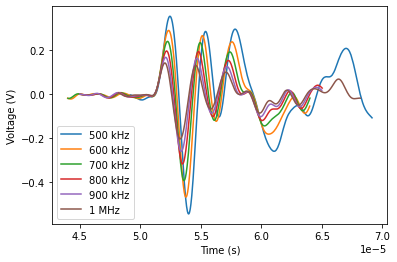

In [115]:
#plt.plot(Cwc2s_400.time,Cwc2s_400.data, label="400 kHz")
plt.plot(Cwc2s_500.time,Cwc2s_500.data, label="500 kHz")
plt.plot(Cwc2s_600.time,Cwc2s_600.data, label="600 kHz")
plt.plot(Cwc2s_700.time,Cwc2s_700.data, label="700 kHz")
plt.plot(Cwc2s_800.time,Cwc2s_800.data, label="800 kHz")
plt.plot(Cwc2s_900.time,Cwc2s_900.data, label="900 kHz")
plt.plot(Cwc2s_1000.time,Cwc2s_1000.data, label="1 MHz")

plt.legend()
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

In [129]:
Cwc2s_600.time[450]

4.85e-05

In [130]:
Cwc2s_600.time[1600]

6e-05

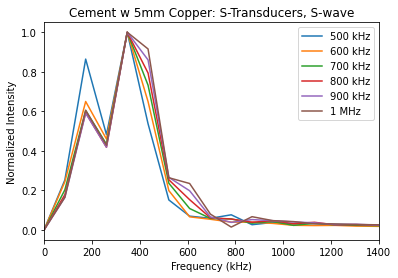

In [132]:
#plt.plot(f4_2s,np.abs(FT4_2s)/max(np.abs(FT4_2s)),label='400 kHz')
plt.plot(f5_2s,np.abs(FT5_2s)/max(np.abs(FT5_2s)),label='500 kHz')
plt.plot(f6_2s,np.abs(FT6_2s)/max(np.abs(FT6_2s)),label='600 kHz')
plt.plot(f7_2s,np.abs(FT7_2s)/max(np.abs(FT7_2s)),label='700 kHz')
plt.plot(f8_2s,np.abs(FT8_2s)/max(np.abs(FT8_2s)),label='800 kHz')
plt.plot(f9_2s,np.abs(FT9_2s)/max(np.abs(FT9_2s)),label='900 kHz')
plt.plot(f10_2s,np.abs(FT10_2s)/max(np.abs(FT10_2s)),label='1 MHz')

plt.title("Cement w 5mm Copper: S-Transducers, S-wave")
plt.xlim([0,1400])
plt.legend()
plt.ylabel('Normalized Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('Figures/CemCopp5mm_Strans_SWaveFFT.jpeg',dpi=300)


In [127]:
# Frequency at peak (Hz):
print(f5_2s[np.argmax(np.abs(FT5_2s))])
print(f6_2s[np.argmax(np.abs(FT6_2s))])
print(f7_2s[np.argmax(np.abs(FT7_2s))])
print(f8_2s[np.argmax(np.abs(FT8_2s))])
print(f9_2s[np.argmax(np.abs(FT9_2s))])
print(f10_2s[np.argmax(np.abs(FT10_2s))])

print("")
print(f5_2s[2]-f5_2s[1])
print(f6_2s[2]-f6_2s[1])
print(f7_2s[2]-f7_2s[1])
print(f8_2s[2]-f8_2s[1])
print(f9_2s[2]-f9_2s[1])
print(f10_2s[2]-f10_2s[1])

-347.82608695646616
347.82608695646616
-347.82608695646616
347.82608695646616
347.82608695646616
347.82608695646616

86.95652173912094
86.95652173912094
86.95652173912094
86.95652173912094
86.95652173912094
86.95652173912094


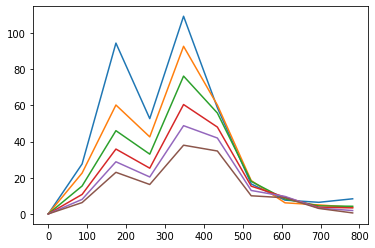

In [9]:
plt.plot(f5_2s[575:585],np.abs(FT5_2s[575:585]),label='500 kHz')
plt.plot(f6_2s[575:585],np.abs(FT6_2s[575:585]),label='600 kHz')
plt.plot(f7_2s[575:585],np.abs(FT7_2s[575:585]),label='700 kHz')
plt.plot(f8_2s[575:585],np.abs(FT8_2s[575:585]),label='800 kHz')
plt.plot(f9_2s[575:585],np.abs(FT9_2s[575:585]),label='900 kHz')
plt.plot(f10_2s[575:585],np.abs(FT10_2s[575:585]),label='1 MHz')

In [11]:
print('500kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f5_2s[575:585],np.abs(FT5_2s[575:585])/max(np.abs(FT5_2s[575:585])))
print('600kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f6_2s[575:585],np.abs(FT6_2s[575:585])/max(np.abs(FT6_2s[575:585])))
print('700 kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f7_2s[575:585],np.abs(FT7_2s[575:585])/max(np.abs(FT7_2s[575:585])))
print('800 kHz')
x5,gaus5,index5, central5, fwhm5 = FWHM(f8_2s[575:585],np.abs(FT8_2s[575:585])/max(np.abs(FT8_2s[575:585])))
print('900kHz')
x6,gaus6,index6, central6, fwhm6 = FWHM(f9_2s[575:585],np.abs(FT9_2s[575:585])/max(np.abs(FT9_2s[575:585])))
print('1000kHz')
x7,gaus7,index7, central7, fwhm7 = FWHM(f10_2s[575:585],np.abs(FT10_2s[575:585])/max(np.abs(FT10_2s[575:585])))

500kHz
Peak Index: 37
Central Frequency: 292.49011857702834
FWHM: 339.92094861654647

600kHz
Peak Index: 41
Central Frequency: 324.1106719367071
FWHM: 332.0158102766268

700 kHz
Peak Index: 43
Central Frequency: 339.92094861654647
FWHM: 324.1106719367071

800 kHz
Peak Index: 44
Central Frequency: 347.82608695646616
FWHM: 332.0158102766268

900kHz
Peak Index: 45
Central Frequency: 355.73122529638584
FWHM: 332.0158102766267

1000kHz
Peak Index: 45
Central Frequency: 355.73122529638584
FWHM: 332.0158102766267



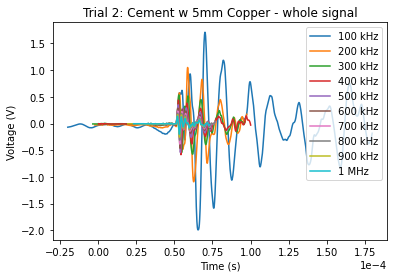

In [7]:
plt.plot(Cwc2_100.time,Cwc2_100.data, label="100 kHz")
plt.plot(Cwc2_200.time,Cwc2_200.data, label="200 kHz")
plt.plot(Cwc2_300.time,Cwc2_300.data, label="300 kHz")
plt.plot(Cwc2_400.time,Cwc2_400.data, label="400 kHz")
plt.plot(Cwc2_500.time,Cwc2_500.data, label="500 kHz")
plt.plot(Cwc2_600.time,Cwc2_600.data, label="600 kHz")
plt.plot(Cwc2_700.time,Cwc2_700.data, label="700 kHz")
plt.plot(Cwc2_800.time,Cwc2_800.data, label="800 kHz")
plt.plot(Cwc2_900.time,Cwc2_900.data, label="900 kHz")
plt.plot(Cwc2_1000.time,Cwc2_1000.data, label="1 MHz")

plt.legend()
plt.title("Trial 2: Cement w 5mm Copper - whole signal")
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))  # changes long decimals to scientific notation
plt.savefig('CemCopp5mm_Strans_WholeWave_T2.jpeg',dpi=300)

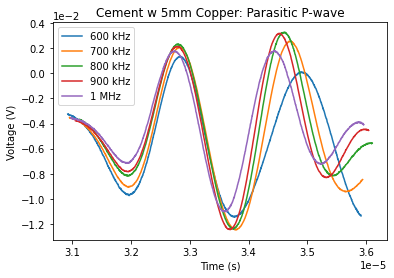

In [20]:
#plt.plot(Cwc2p_100.time,Cwc2p_100.data, label="100 kHz")
#plt.plot(Cwc2p_200.time,Cwc2p_200.data, label="200 kHz")
#plt.plot(Cwc2p_300.time,Cwc2p_300.data, label="300 kHz")
#plt.plot(Cwc2p_400.time,Cwc2p_400.data, label="400 kHz")
#plt.plot(Cwc2p_500.time,Cwc2p_500.data, label="500 kHz")
plt.plot(Cwc2p_600.time-0.015e-5,Cwc2p_600.data, label="600 kHz")
plt.plot(Cwc2p_700.time-0.009e-5,Cwc2p_700.data, label="700 kHz")
plt.plot(Cwc2p_800.time-0.006e-5,Cwc2p_800.data, label="800 kHz")
plt.plot(Cwc2p_900.time-0.002e-5,Cwc2p_900.data, label="900 kHz")
plt.plot(Cwc2p_1000.time,Cwc2p_1000.data, label="1 MHz")
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,-3))

plt.legend()
plt.title("Cement w 5mm Copper: Parasitic P-wave")
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.savefig('Figures/CemCopp5mm_Strans_PWave_T2.jpeg',dpi=300)

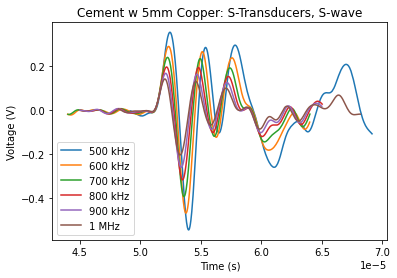

In [131]:
#plt.plot(Cwc2s_100.time,Cwc2s_100.data, label="100 kHz")
#plt.plot(Cwc2s_200.time,Cwc2s_200.data, label="200 kHz")
#plt.plot(Cwc2s_300.time,Cwc2s_300.data, label="300 kHz")
#plt.plot(Cwc2s_400.time,Cwc2s_400.data, label="400 kHz")
plt.plot(Cwc2s_500.time,Cwc2s_500.data, label="500 kHz")
plt.plot(Cwc2s_600.time,Cwc2s_600.data, label="600 kHz")
plt.plot(Cwc2s_700.time,Cwc2s_700.data, label="700 kHz")
plt.plot(Cwc2s_800.time,Cwc2s_800.data, label="800 kHz")
plt.plot(Cwc2s_900.time,Cwc2s_900.data, label="900 kHz")
plt.plot(Cwc2s_1000.time,Cwc2s_1000.data, label="1 MHz")

plt.legend()
#plt.xlim([4.8e-5,6.5e-5])
plt.title("Cement w 5mm Copper: S-Transducers, S-wave")
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.savefig('Figures/CemCopp5mm_Strans_SWave_T2.jpeg',dpi=300)

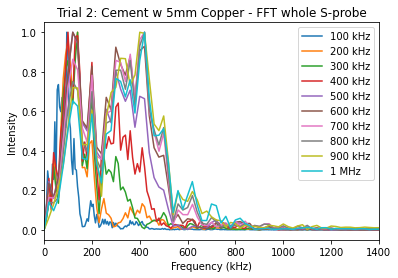

In [14]:
plt.plot(f1_2,np.abs(FT1_2)/max(np.abs(FT1_2)),label='100 kHz')
plt.plot(f2_2,np.abs(FT2_2)/max(np.abs(FT2_2)),label='200 kHz')
plt.plot(f3_2,np.abs(FT3_2)/max(np.abs(FT3_2)),label='300 kHz')
plt.plot(f4_2,np.abs(FT4_2)/max(np.abs(FT4_2)),label='400 kHz')
plt.plot(f5_2,np.abs(FT5_2)/max(np.abs(FT5_2)),label='500 kHz')
plt.plot(f6_2,np.abs(FT6_2)/max(np.abs(FT6_2)),label='600 kHz')
plt.plot(f7_2,np.abs(FT7_2)/max(np.abs(FT7_2)),label='700 kHz')
plt.plot(f8_2,np.abs(FT8_2)/max(np.abs(FT8_2)),label='800 kHz')
plt.plot(f9_2,np.abs(FT9_2)/max(np.abs(FT9_2)),label='900 kHz')
plt.plot(f10_2,np.abs(FT10_2)/max(np.abs(FT10_2)),label='1 MHz')

plt.title("Trial 2: Cement w 5mm Copper - FFT whole S-probe")
plt.xlim([0,1400])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('CemCopp5mm_Strans_wholeWave_T2_FFT.jpeg',dpi=300)

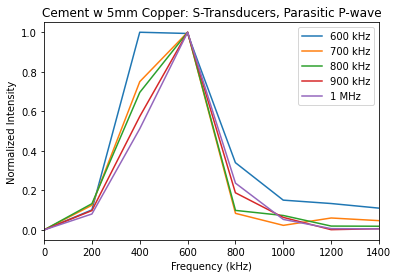

In [11]:
#plt.plot(f1_2p,np.abs(FT1_2p)/max(np.abs(FT1_2p)),label='100 kHz')
#plt.plot(f2_2p,np.abs(FT2_2p)/max(np.abs(FT2_2p)),label='200 kHz')
#plt.plot(f3_2p,np.abs(FT3_2p)/max(np.abs(FT3_2p)),label='300 kHz')
#plt.plot(f4_2p,np.abs(FT4_2p)/max(np.abs(FT4_2p)),label='400 kHz')
#plt.plot(f5_2p,np.abs(FT5_2p)/max(np.abs(FT5_2p)),label='500 kHz')
plt.plot(f6_2p,np.abs(FT6_2p)/max(np.abs(FT6_2p)),label='600 kHz')
plt.plot(f7_2p,np.abs(FT7_2p)/max(np.abs(FT7_2p)),label='700 kHz')
plt.plot(f8_2p,np.abs(FT8_2p)/max(np.abs(FT8_2p)),label='800 kHz')
plt.plot(f9_2p,np.abs(FT9_2p)/max(np.abs(FT9_2p)),label='900 kHz')
plt.plot(f10_2p,np.abs(FT10_2p)/max(np.abs(FT10_2p)),label='1 MHz')

plt.title("Cement w 5mm Copper: S-Transducers, Parasitic P-wave")
plt.xlim([0,1400])
plt.legend()
plt.ylabel('Normalized Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('Figures/CemCopp5mm_Strans_PWave_T2_FFT.jpeg',dpi=300)

In [13]:
len(f6_2p)

2000

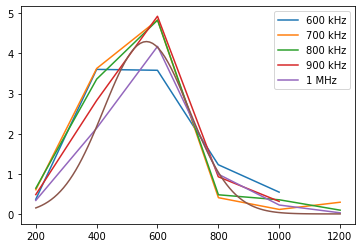

In [30]:
plt.plot(f6_2p[1001:1006],np.abs(FT6_2p[1001:1006]),label='600 kHz')
plt.plot(f7_2p[1000:1006],np.abs(FT7_2p[1000:1006]),label='700 kHz')
plt.plot(f8_2p[1000:1006],np.abs(FT8_2p[1000:1006]),label='800 kHz')
plt.plot(f9_2p[1001:1006],np.abs(FT9_2p[1001:1006]),label='900 kHz')
plt.plot(f10_2p[1000:1006],np.abs(FT10_2p[1000:1006]),label='1 MHz')
plt.legend()
plt.plot(x7,gaus7)

In [24]:
print('600 kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f6_2p[1000:1006],np.abs(FT6_2p[1000:1006]))
print('700 kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f7_2p[1000:1006],np.abs(FT7_2p[1000:1006]))
print('800 kHz')
x5,gaus5,index5, central5, fwhm5 = FWHM(f8_2p[1000:1006],np.abs(FT8_2p[1000:1006]))
print('900kHz')
x6,gaus6,index6, central6, fwhm6 = FWHM(f9_2p[1001:1006],np.abs(FT9_2p[1001:1006]))
print('1000kHz')
x7,gaus7,index7, central7, fwhm7 = FWHM(f10_2p[1000:1006],np.abs(FT10_2p[1000:1006]))

600 kHz
Peak Index: 51
Central Frequency: 515.1515151503855
FWHM: 404.04040403951797

700 kHz
Peak Index: 32
Central Frequency: 523.494070267728
FWHM: 303.1818939774487

800 kHz
Peak Index: 32
Central Frequency: 523.494070267728
FWHM: 313.2879571100302

900kHz
Peak Index: 43
Central Frequency: 547.474747473547
FWHM: 323.23232323161443

1000kHz
Peak Index: 36
Central Frequency: 563.9183227980545
FWHM: 323.394020242612



In [19]:
print(f6_2p[np.argmax(np.abs(FT6_2p))])
print(f7_2p[np.argmax(np.abs(FT7_2p))])
print(f8_2p[np.argmax(np.abs(FT8_2p))])
print(f9_2p[np.argmax(np.abs(FT9_2p))])
print(f10_2p[np.argmax(np.abs(FT10_2p))])

-399.9999999991229
-600.3001500753484
600.3001500753484
-599.9999999986844
-600.3001500753484


In [27]:
print(f6_2p[2]-f6_2p[1])
print(f7_2p[2]-f7_2p[1])
print(f8_2p[2]-f8_2p[1])
print(f9_2p[2]-f9_2p[1])
print(f10_2p[2]-f10_2p[1])

199.99999999956344
200.1000500251248
200.1000500251248
199.99999999956344
200.1000500251248


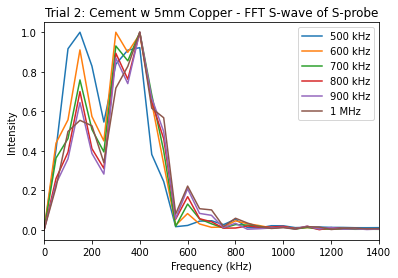

In [13]:
#plt.plot(f1_2s,np.abs(FT1_2s)/max(np.abs(FT1_2s)),label='100 kHz')
#plt.plot(f2_2s,np.abs(FT2_2s)/max(np.abs(FT2_2s)),label='200 kHz')
#plt.plot(f3_2s,np.abs(FT3_2s)/max(np.abs(FT3_2s)),label='300 kHz')
#plt.plot(f4_2s,np.abs(FT4_2s)/max(np.abs(FT4_2s)),label='400 kHz')
plt.plot(f5_2s,np.abs(FT5_2s)/max(np.abs(FT5_2s)),label='500 kHz')
plt.plot(f6_2s,np.abs(FT6_2s)/max(np.abs(FT6_2s)),label='600 kHz')
plt.plot(f7_2s,np.abs(FT7_2s)/max(np.abs(FT7_2s)),label='700 kHz')
plt.plot(f8_2s,np.abs(FT8_2s)/max(np.abs(FT8_2s)),label='800 kHz')
plt.plot(f9_2s,np.abs(FT9_2s)/max(np.abs(FT9_2s)),label='900 kHz')
plt.plot(f10_2s,np.abs(FT10_2s)/max(np.abs(FT10_2s)),label='1 MHz')

plt.title("Trial 2: Cement w 5mm Copper - FFT S-wave of S-probe")
plt.xlim([0,1400])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('CemCopp5mm_Strans_SWave_T2_FFT.jpeg',dpi=300)

# Continuous Cycles

In [19]:
Cwc_100C=timedata('Cwc_100C')
readlabdat('feb9_36.csv',Cwc_100C)
Cwc_200C=timedata('Cwc_200C')
readlabdat('feb9_37.csv',Cwc_200C)
Cwc_300C=timedata('Cwc_300C')
readlabdat('feb9_38.csv',Cwc_300C)
Cwc_400C=timedata('Cwc_400C')
readlabdat('feb9_39.csv',Cwc_400C)
Cwc_500C=timedata('Cwc_500C')
readlabdat('feb9_40.csv',Cwc_500C)
Cwc_600C=timedata('Cwc_600C')
readlabdat('feb9_41.csv',Cwc_600C)
Cwc_700C=timedata('Cwc_700C')
readlabdat('feb9_43.csv',Cwc_700C)
Cwc_800C=timedata('Cwc_800C')
readlabdat('feb9_45.csv',Cwc_800C)
Cwc_900C=timedata('Cwc_900C')
readlabdat('feb9_47.csv',Cwc_900C)
Cwc_1000C=timedata('Cwc_1000C')
readlabdat('feb9_49.csv',Cwc_1000C)

f1C,FT1C=myfft(Cwc_100C.time,Cwc_100C.data)
f2C,FT2C=myfft(Cwc_200C.time,Cwc_200C.data)
f3C,FT3C=myfft(Cwc_300C.time,Cwc_300C.data)
f4C,FT4C=myfft(Cwc_400C.time,Cwc_400C.data)
f5C,FT5C=myfft(Cwc_500C.time,Cwc_500C.data)
f6C,FT6C=myfft(Cwc_600C.time,Cwc_600C.data)
f7C,FT7C=myfft(Cwc_700C.time,Cwc_700C.data)
f8C,FT8C=myfft(Cwc_800C.time,Cwc_800C.data)
f9C,FT9C=myfft(Cwc_900C.time,Cwc_900C.data)
f10C,FT10C=myfft(Cwc_1000C.time,Cwc_1000C.data)

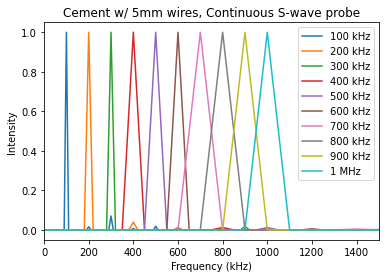

In [22]:
plt.title('Cement w/ 5mm wires, Continuous S-wave probe')
plt.plot(f1C,np.abs(FT1C)/max(np.abs(FT1C)),label='100 kHz')
plt.plot(f2C,np.abs(FT2C)/max(np.abs(FT2C)),label='200 kHz')
plt.plot(f3C,np.abs(FT3C)/max(np.abs(FT3C)),label='300 kHz')
plt.plot(f4C,np.abs(FT4C)/max(np.abs(FT4C)),label='400 kHz')
plt.plot(f5C,np.abs(FT5C)/max(np.abs(FT5C)),label='500 kHz')
plt.plot(f6C,np.abs(FT6C)/max(np.abs(FT6C)),label='600 kHz')
plt.plot(f7C,np.abs(FT7C)/max(np.abs(FT7C)),label='700 kHz')
plt.plot(f8C,np.abs(FT8C)/max(np.abs(FT8C)),label='800 kHz')
plt.plot(f9C,np.abs(FT9C)/max(np.abs(FT9C)),label='900 kHz')
plt.plot(f10C,np.abs(FT10C)/max(np.abs(FT10C)),label='1 MHz')

plt.xlim([0,1500])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('CemCopp5mm_Strans_ContWhole_FFT.jpeg',dpi=300)

In [57]:
# examine strange wiggle in continuous signal

Cwc_600wig=timedata('Cwc_600wig')
readlabdat('feb9_42.csv',Cwc_600wig)
Cwc_700wig=timedata('Cwc_700wig')
readlabdat('feb9_44.csv',Cwc_700wig)
Cwc_800wig=timedata('Cwc_800wig')
readlabdat('feb9_46.csv',Cwc_800wig)
Cwc_900wig=timedata('Cwc_900wig')
readlabdat('feb9_48.csv',Cwc_900wig)
Cwc_1000wig=timedata('Cwc_1000wig')
readlabdat('feb9_50.csv',Cwc_1000wig)

f6wig,FT6wig=myfft(Cwc_600wig.time,Cwc_600wig.data)
f7wig,FT7wig=myfft(Cwc_700wig.time,Cwc_700wig.data)
f8wig,FT8wig=myfft(Cwc_800wig.time,Cwc_800wig.data)
f9wig,FT9wig=myfft(Cwc_900wig.time,Cwc_900wig.data)
f10wig,FT10wig=myfft(Cwc_1000wig.time,Cwc_1000wig.data)

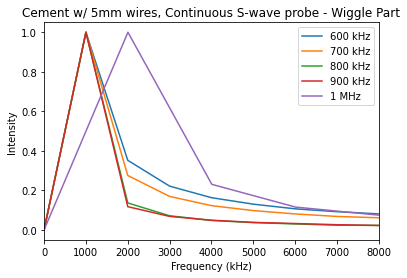

In [58]:
plt.title('Cement w/ 5mm wires, Continuous S-wave probe - Wiggle Part')

plt.plot(f6wig,np.abs(FT6wig)/max(np.abs(FT6wig)),label='600 kHz')
plt.plot(f7wig,np.abs(FT7wig)/max(np.abs(FT7wig)),label='700 kHz')
plt.plot(f8wig,np.abs(FT8wig)/max(np.abs(FT8wig)),label='800 kHz')
plt.plot(f9wig,np.abs(FT9wig)/max(np.abs(FT9wig)),label='900 kHz')
plt.plot(f10wig,np.abs(FT10wig)/max(np.abs(FT10wig)),label='1 MHz')

plt.xlim([0,8000])
plt.legend()
plt.ylabel('Intensity')
plt.xlabel('Frequency (kHz)')
plt.savefig('CemCopp5mm_Strans_ContWiggle_FFT.jpeg',dpi=300)

(0.0, 3e-06)

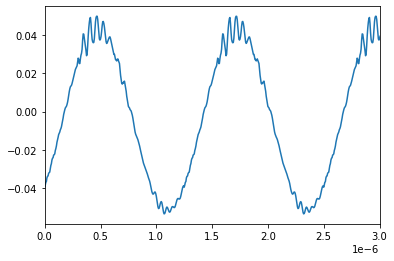

In [64]:
# show what this small underlying signal (wiggle) looks like:

plt.plot(Cwc_800C.time,Cwc_800C.data)
#plt.plot(Cwc_800wig.time,Cwc_800wig.data)
plt.xlim([0,3e-6])